# **PLUCKED STRING**

 dt= 0.0024999999999999996


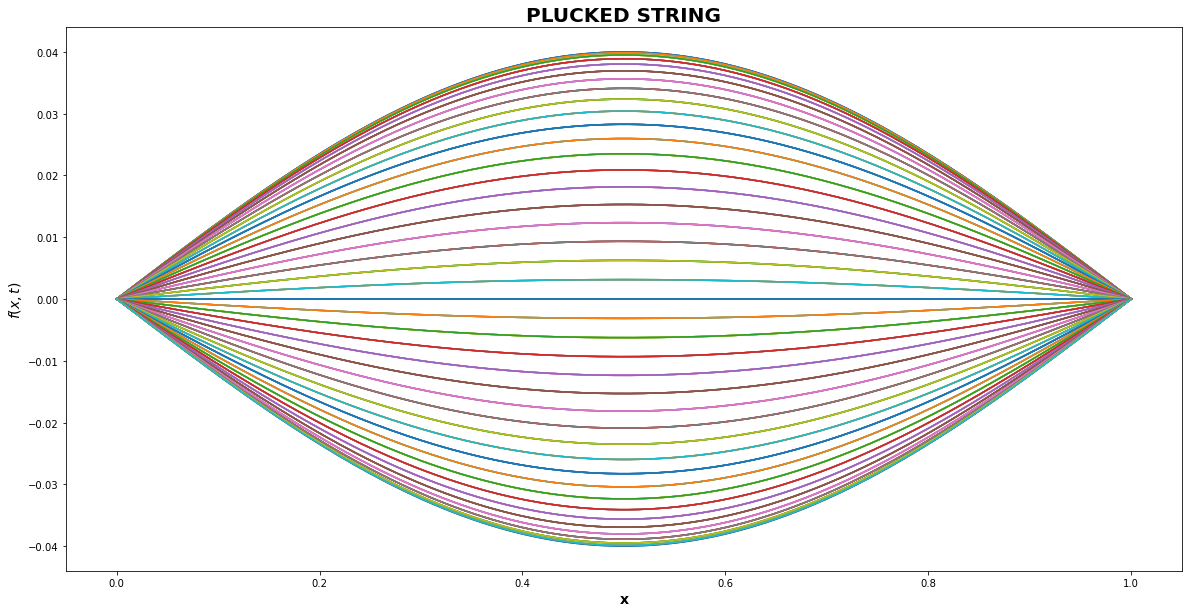

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import display

N,t = 200,0.0 
plt.figure(figsize  = (20,10))
plt.xlabel(r'x',fontweight='bold',fontsize='14')
plt.ylabel(r'$f(x,t)$',fontweight='bold',fontsize='14')
plt.title('PLUCKED STRING',fontweight='bold',fontsize='20')

x = np.linspace(0,1,N+1) ##taking N+1 points

dx = x[3]-x[2]
dt = 0.5*dx
print (' dt=' , dt)

Pos =  0.04*np.sin(np.pi*x)

Axer = np.zeros(N+1)  ## ACCELARATION ARRAY 
Vel = np.zeros(N+1)  ##inital velocity

for l in range(1,N):
    Axer[l] = (1/(dx*dx))*(Pos[l+1]+Pos[l-1]-2*Pos[l])  ##calculating acceleration for each bead

xos = Pos ## This is a array in which i will be stacking the position at differnt instants  

N_iter = 2000   ## iteration number
for i in range(N_iter):
    
    if(i%10==0): ##plotting condition of beads after 10dt. you can change it if you want
        plt.plot(x,Pos)

    Pos= Pos+Vel*dt/2.0  #updating position
    for j2 in range(1,N):    
        Axer[j2]= (1/(dx*dx))*(Pos[j2+1]+Pos[j2-1]-2*Pos[j2]) #updating acceleration
 
  

    Vel =  Vel+Axer*dt ##updating velocity
    Pos= Pos+Vel*dt/2.0  ##updating position again. yeah that's verlet 
    xos = np.vstack((xos,Pos)) ##it contains position of each bead at different instant as a column 

plt.show() 

### **NOW FOR THE ANIMATION PART**

In [2]:
import bqplot.pyplot as plt
from ipywidgets import*

duration = 10 ### IF YOU WANNA CHANGE ANIMATION DURATION 



plt.figure(animation_duration = duration,layout = {'width':'900px','height':'700px'}) ##creating bqplot figure

plot  = plt.plot(x,x) ## it's a plot function . it's "Y array " value will change in the animation funtion  
plt.ylim(-0.05,0.05)
plt.show()
def animation(n):
    global plot
    plot.y = xos[n,:]
    
w = interactive(animation,n = Play(value = 0,step = 2,min = 0,max = N_iter,interval = duration))    
display(w)

interactive(children=(Play(value=0, description='n', interval=10, max=2000, step=2), Output()), _dom_classes=(…